In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import warnings
warnings.filterwarnings('ignore') # A couple math no-no's in this example, but ignore them

In [3]:
# Define differential equation
def dxdV(V, x):
  dxdV = np.zeros((1,1))
  k1 =  0.125 # lbmol/ft^3/h
  beta = 0.00140
  K = 0.0485
  P = 300 # atm
  N2o = 1 # inlet N2 flow lbmol/hr

  yN = (1 - x) / (4 - 2 * x)
  yH = 3 * yN
  yNH3 = 2 * x / (4 - 2 * x)

  dxdV[0] = ( N2o**-1 * k1*( yN * yH**3 - yNH3**2 / (K**2 * P**2))
           / ( (yNH3 * yH**0.5 + beta * yH**2)**1.5 ) )

  return dxdV

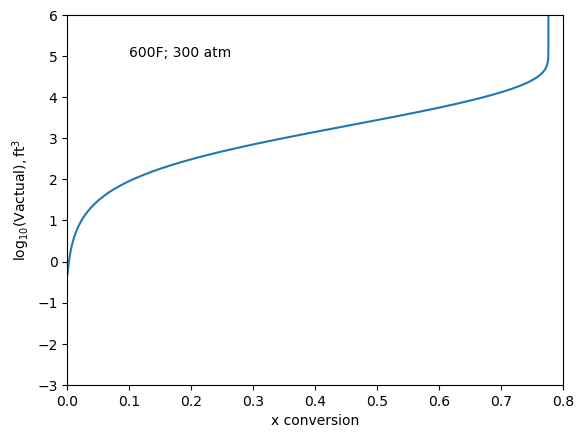

In [4]:
# Initialize
initialconversion = [0]
Vrange = [0, 4000] # ft^3

# Solve ODE trol and atol adjustment if for matching the MATLAB output
results = solve_ivp(dxdV,  Vrange, initialconversion, method = 'RK45', rtol = 1e-9, atol = 1e-10)

# Collect results
V, x = results.t, results.y
Vactual = V * 268 / (x + 1E-08)
logVactual = np.log10(Vactual)

# Plot results
plt.plot(*x, *logVactual) # Don't worry about the *'s; they are just to "unpack" the arrays
plt.xlim(0, 0.8)
plt.xlabel('x conversion')
plt.ylim(-3, 6)
plt.ylabel(r'$\mathrm{log_{10}(Vactual), ft^3}$') # Formatted using LATEX
plt.text(0.1, 5, '600F; 300 atm')
plt.show()

In [5]:
display(pd.DataFrame([*x, *Vactual*1E-04], index=['x', 'Vactual/10000']).T)

,x,Vactual/10000
0,0.000000,0.000000
1,0.000245,0.000050
2,0.000448,0.000054
3,0.000686,0.000058
4,0.000939,0.000064
...,...,...
193,0.775838,121.959834
194,0.775838,126.439025
195,0.775838,130.918216
196,0.775838,136.040810
